In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn import metrics
from sklearn.pipeline import make_pipeline
%matplotlib inline
from sklearn.decomposition import PCA

# Ignore Warning Code
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Import data file 
file_path = "/Users/igmark/Desktop/WGU Data Files/D212_churn_clean.csv"
df = pd.read_csv(file_path)

In [3]:
#View first 5 rows of the dataframe 
df.head()

CaseOrder Customer_id                           Interaction  \
0          1     K409198  aa90260b-4141-4a24-8e36-b04ce1f4f77b   
1          2     S120509  fb76459f-c047-4a9d-8af9-e0f7d4ac2524   
2          3     K191035  344d114c-3736-4be5-98f7-c72c281e2d35   
3          4      D90850  abfa2b40-2d43-4994-b15a-989b8c79e311   
4          5     K662701  68a861fd-0d20-4e51-a587-8a90407ee574   

                                UID         City State                 County  \
0  e885b299883d4f9fb18e39c75155d990  Point Baker    AK  Prince of Wales-Hyder   
1  f2de8bef964785f41a2959829830fb8a  West Branch    MI                 Ogemaw   
2  f1784cfa9f6d92ae816197eb175d3c71      Yamhill    OR                Yamhill   
3  dc8a365077241bb5cd5ccd305136b05e      Del Mar    CA              San Diego   
4  aabb64a116e83fdc4befc1fbab1663f9    Needville    TX              Fort Bend   

     Zip       Lat        Lng  ...  MonthlyCharge Bandwidth_GB_Year Item1  \
0  99927  56.25100 -133.37571  ...     172.455519        904.536110     5   
1  48661  44.32893  -84.24080  ...     242.632554        800.982766     3   
2  97148  45.35589 -123.24657  ...     159.947583       2054.706961     4   
3  92014  32.96687 -117.24798  ...     119.956840       2164.579412     4   
4  77461  29.38012  -95.80673  ...     149.948316        271.493436     4   

  Item2  Item3  Item4  Item5 Item6 Item7 Item8  
0     5      5      3      4     4     3     4  
1     4      3      3      4     3     4     4  
2     4      2      4      4     3     3     3  
3     4      4      2      5     4     3     3  
4     4      4      3      4     4     4     5  

[5 rows x 50 columns]

In [4]:
#Statistics for Continuous Variables
df.describe()

CaseOrder           Zip           Lat           Lng     Population  \
count  10000.00000  10000.000000  10000.000000  10000.000000   10000.000000   
mean    5000.50000  49153.319600     38.757567    -90.782536    9756.562400   
std     2886.89568  27532.196108      5.437389     15.156142   14432.698671   
min        1.00000    601.000000     17.966120   -171.688150       0.000000   
25%     2500.75000  26292.500000     35.341828    -97.082812     738.000000   
50%     5000.50000  48869.500000     39.395800    -87.918800    2910.500000   
75%     7500.25000  71866.500000     42.106908    -80.088745   13168.000000   
max    10000.00000  99929.000000     70.640660    -65.667850  111850.000000   

         Children           Age         Income  Outage_sec_perweek  \
count  10000.0000  10000.000000   10000.000000        10000.000000   
mean       2.0877     53.078400   39806.926771           10.001848   
std        2.1472     20.698882   28199.916702            2.976019   
min        0.0000     18.000000     348.670000            0.099747   
25%        0.0000     35.000000   19224.717500            8.018214   
50%        1.0000     53.000000   33170.605000           10.018560   
75%        3.0000     71.000000   53246.170000           11.969485   
max       10.0000     89.000000  258900.700000           21.207230   

              Email  ...  MonthlyCharge  Bandwidth_GB_Year         Item1  \
count  10000.000000  ...   10000.000000       10000.000000  10000.000000   
mean      12.016000  ...     172.624816        3392.341550      3.490800   
std        3.025898  ...      42.943094        2185.294852      1.037797   
min        1.000000  ...      79.978860         155.506715      1.000000   
25%       10.000000  ...     139.979239        1236.470827      3.000000   
50%       12.000000  ...     167.484700        3279.536903      3.000000   
75%       14.000000  ...     200.734725        5586.141370      4.000000   
max       23.000000  ...     290.160419        7158.981530      7.000000   

              Item2         Item3         Item4         Item5         Item6  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean       3.505100      3.487000      3.497500      3.492900      3.497300   
std        1.034641      1.027977      1.025816      1.024819      1.033586   
min        1.000000      1.000000      1.000000      1.000000      1.000000   
25%        3.000000      3.000000      3.000000      3.000000      3.000000   
50%        4.000000      3.000000      3.000000      3.000000      3.000000   
75%        4.000000      4.000000      4.000000      4.000000      4.000000   
max        7.000000      8.000000      7.000000      7.000000      8.000000   

              Item7         Item8  
count  10000.000000  10000.000000  
mean       3.509500      3.495600  
std        1.028502      1.028633  
min        1.000000      1.000000  
25%        3.000000      3.000000  
50%        4.000000      3.000000  
75%        4.000000      4.000000  
max        7.000000      8.000000  

[8 rows x 23 columns]

In [5]:
#Detect missing values 
df.isnull().sum()

CaseOrder               0
Customer_id             0
Interaction             0
UID                     0
City                    0
State                   0
County                  0
Zip                     0
Lat                     0
Lng                     0
Population              0
Area                    0
TimeZone                0
Job                     0
Children                0
Age                     0
Income                  0
Marital                 0
Gender                  0
Churn                   0
Outage_sec_perweek      0
Email                   0
Contacts                0
Yearly_equip_failure    0
Techie                  0
Contract                0
Port_modem              0
Tablet                  0
InternetService         0
Phone                   0
Multiple                0
OnlineSecurity          0
OnlineBackup            0
DeviceProtection        0
TechSupport             0
StreamingTV             0
StreamingMovies         0
PaperlessBilling        0
PaymentMetho

In [6]:
# Detect duplicated entries 
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

In [7]:
df.info(file_path)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   UID                   10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  TimeZone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              10000 non-null  int64  
 15  Age                 

In [8]:
#View dataset columns 
df.columns

Index(['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State',
       'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 'Job',
       'Children', 'Age', 'Income', 'Marital', 'Gender', 'Churn',
       'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure',
       'Techie', 'Contract', 'Port_modem', 'Tablet', 'InternetService',
       'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'PaymentMethod', 'Tenure', 'MonthlyCharge',
       'Bandwidth_GB_Year', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5',
       'Item6', 'Item7', 'Item8'],
      dtype='object')

### Remove Outliers

In [9]:
#check for outliers and remove
print(df.shape)
df = df[(np.abs(stats.zscore(df.select_dtypes(include=np.number))) < 3).all(axis=1)]
print(df.shape)

(10000, 50)
(8950, 50)


### Remove Unneeded Columns

In [10]:
non_numeric = df[['City','County','Zip','Job','TimeZone', 'Population',
          'Lat','Lng','UID', 'Customer_id','Interaction','CaseOrder','State','Gender',
          'Churn','Techie','Contract','Port_modem', 'Area','Tablet','Phone',
           'OnlineSecurity','Multiple','OnlineBackup','TechSupport','DeviceProtection','StreamingTV',
          'StreamingMovies','PaperlessBilling','PaymentMethod','Marital','InternetService', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5',
       'Item6', 'Item7', 'Item8']]

In [11]:
non_numeric

City     County    Zip                              Job  \
1      West Branch     Ogemaw  48661           Programmer, multimedia   
2          Yamhill    Yamhill  97148          Chief Financial Officer   
3          Del Mar  San Diego  92014                        Solicitor   
4        Needville  Fort Bend  77461              Medical illustrator   
5      Fort Valley      Peach  31030         Chief Technology Officer   
...            ...        ...    ...                              ...   
9994     West Kill     Greene  12492                     Youth worker   
9995   Mount Holly    Rutland   5758  Sport and exercise psychologist   
9997      Mobeetie    Wheeler  79061     IT technical support officer   
9998    Carrollton    Carroll  30117                   Water engineer   
9999  Clarkesville  Habersham  30523               Personal assistant   

                 TimeZone  Population       Lat        Lng  \
1         America/Detroit       10446  44.32893  -84.24080   
2     America/Los_Angeles        3735  45.35589 -123.24657   
3     America/Los_Angeles       13863  32.96687 -117.24798   
4         America/Chicago       11352  29.38012  -95.80673   
5        America/New_York       17701  32.57032  -83.89040   
...                   ...         ...       ...        ...   
9994     America/New_York         210  42.18491  -74.33574   
9995     America/New_York         640  43.43391  -72.78734   
9997      America/Chicago         406  35.52039 -100.44180   
9998     America/New_York       35575  33.58016  -85.13241   
9999     America/New_York       12230  34.70783  -83.53648   

                                   UID Customer_id  ...        Marital  \
1     f2de8bef964785f41a2959829830fb8a     S120509  ...        Married   
2     f1784cfa9f6d92ae816197eb175d3c71     K191035  ...        Widowed   
3     dc8a365077241bb5cd5ccd305136b05e      D90850  ...        Married   
4     aabb64a116e83fdc4befc1fbab1663f9     K662701  ...      Separated   
5     97598fd95658c80500546bc1dd312994     W303516  ...  Never Married   
...                                ...         ...  ...            ...   
9994  0ebfa51b03465a2ddb17884bbb4eabb6     P175475  ...      Separated   
9995  9499fb4de537af195d16d046b79fd20a     M324793  ...        Married   
9997  9c41f212d1e04dca84445019bbc9b41c     I243405  ...  Never Married   
9998  3e1f269b40c235a1038863ecf6b7a0df     I641617  ...      Separated   
9999  0ea683a03a3cd544aefe8388aab16176      T38070  ...  Never Married   

      InternetService Item1 Item2 Item3 Item4 Item5 Item6 Item7 Item8  
1         Fiber Optic     3     4     3     3     4     3     4     4  
2                 DSL     4     4     2     4     4     3     3     3  
3                 DSL     4     4     4     2     5     4     3     3  
4         Fiber Optic     4     4     4     3     4     4     4     5  
5                None     3     3     3     2     4     3     3     3  
...               ...   ...   ...   ...   ...   ...   ...   ...   ...  
9994              DSL     4     3     4     4     3     3     4     4  
9995              DSL     3     2     3     3     4     3     2     3  
9997      Fiber Optic     4     4     4     4     4     4     4     5  
9998      Fiber Optic     4     4     6     4     3     3     5     4  
9999      Fiber Optic     2     2     3     3     3     3     4     1  

[8950 rows x 40 columns]

In [12]:
df_numeric = df.drop(non_numeric, axis=1)

In [13]:
df_numeric.describe()

Children          Age         Income  Outage_sec_perweek  \
count  8950.000000  8950.000000    8950.000000         8950.000000   
mean      1.941453    53.161341   38329.400298           10.009065   
std       1.890668    20.634274   25123.528844            2.926500   
min       0.000000    18.000000     348.670000            1.144796   
25%       0.000000    35.000000   19041.117500            8.031398   
50%       1.000000    53.000000   32778.475000           10.016014   
75%       3.000000    71.000000   52280.437500           11.961618   
max       8.000000    89.000000  124025.100000           18.851730   

             Email     Contacts  Yearly_equip_failure       Tenure  \
count  8950.000000  8950.000000           8950.000000  8950.000000   
mean     12.021676     0.941676              0.374749    34.423473   
std       3.011651     0.900798              0.582945    26.445276   
min       3.000000     0.000000              0.000000     1.005104   
25%      10.000000     0.000000              0.000000     7.892645   
50%      12.000000     1.000000              0.000000    29.772986   
75%      14.000000     2.000000              1.000000    61.389790   
max      21.000000     3.000000              2.000000    71.999280   

       MonthlyCharge  Bandwidth_GB_Year  
count    8950.000000        8950.000000  
mean      172.783589        3379.459169  
std        42.990050        2185.204136  
min        79.978860         155.506715  
25%       139.979239        1228.078013  
50%       167.484705        3120.633000  
75%       202.443300        5579.370794  
max       290.160419        7158.981530

In [14]:
df_numeric.columns

Index(['Children', 'Age', 'Income', 'Outage_sec_perweek', 'Email', 'Contacts',
       'Yearly_equip_failure', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year'],
      dtype='object')

### Examine Missing Values

In [15]:
df_numeric.isnull().sum()

Children                0
Age                     0
Income                  0
Outage_sec_perweek      0
Email                   0
Contacts                0
Yearly_equip_failure    0
Tenure                  0
MonthlyCharge           0
Bandwidth_GB_Year       0
dtype: int64

### Examine Distribution

array([[<AxesSubplot: title={'center': 'Children'}>,
        <AxesSubplot: title={'center': 'Age'}>,
        <AxesSubplot: title={'center': 'Income'}>],
       [<AxesSubplot: title={'center': 'Outage_sec_perweek'}>,
        <AxesSubplot: title={'center': 'Email'}>,
        <AxesSubplot: title={'center': 'Contacts'}>],
       [<AxesSubplot: title={'center': 'Yearly_equip_failure'}>,
        <AxesSubplot: title={'center': 'Tenure'}>,
        <AxesSubplot: title={'center': 'MonthlyCharge'}>],
       [<AxesSubplot: title={'center': 'Bandwidth_GB_Year'}>,
        <AxesSubplot: >, <AxesSubplot: >]], dtype=object)

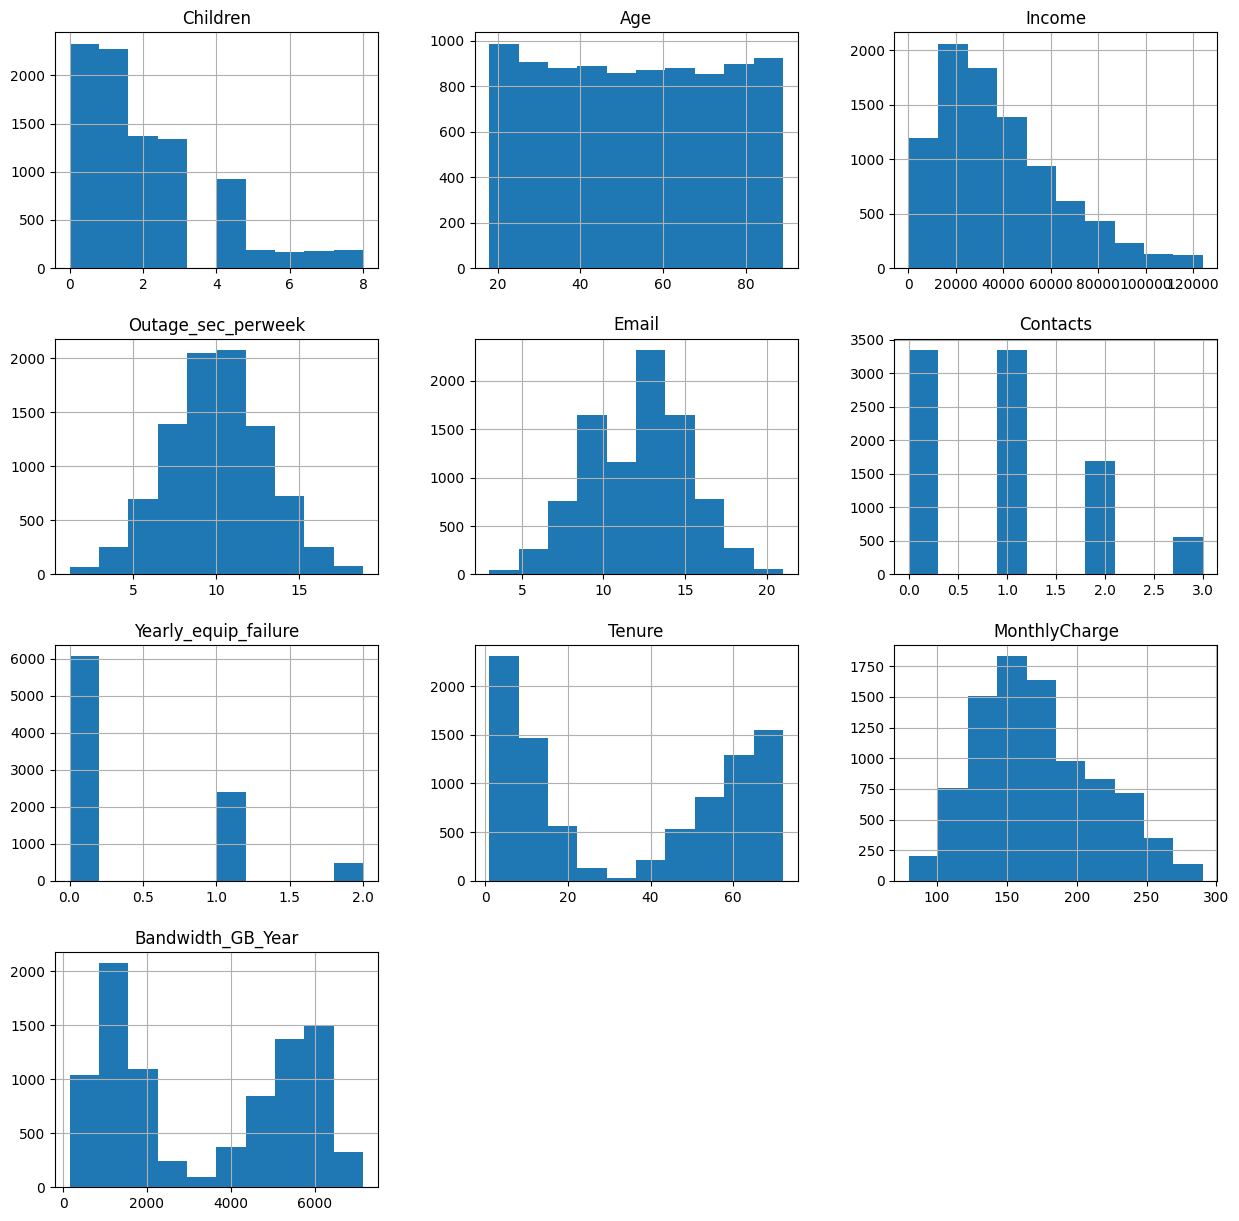

In [16]:
df_numeric.hist(figsize = (15,15))

<AxesSubplot: >

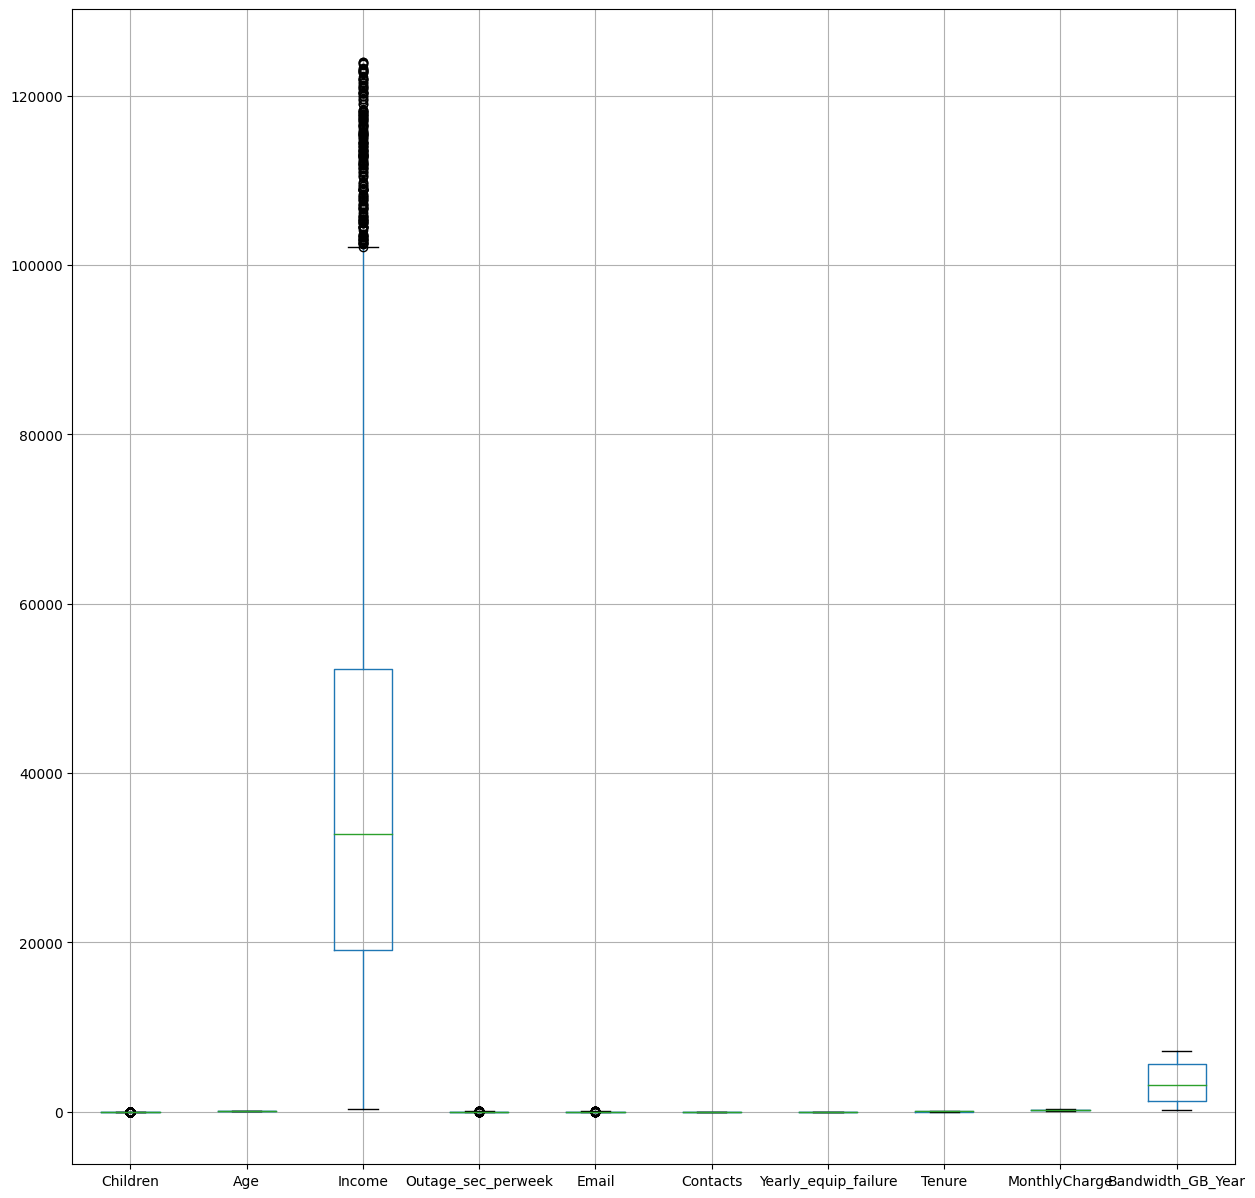

In [17]:
df_numeric.boxplot(figsize = (15,15))

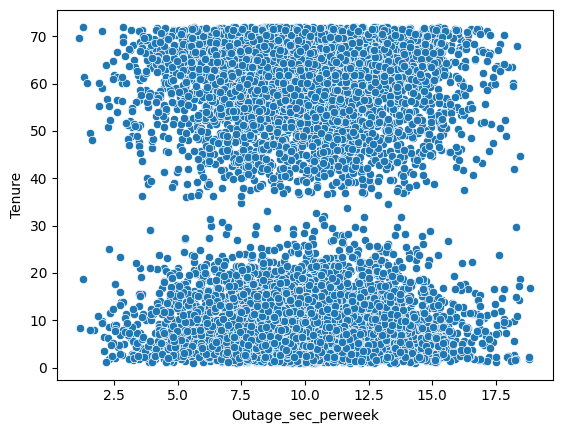

In [18]:
sns.scatterplot(x=df_numeric['Outage_sec_perweek'],y=df_numeric['Tenure'])
plt.show()

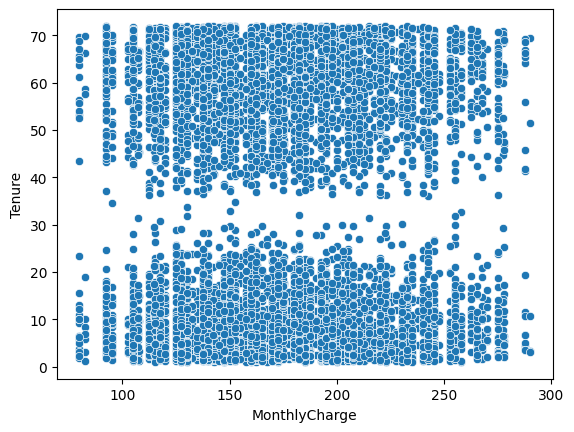

In [19]:
sns.scatterplot(x=df_numeric['MonthlyCharge'],y=df_numeric['Tenure'])
plt.show()

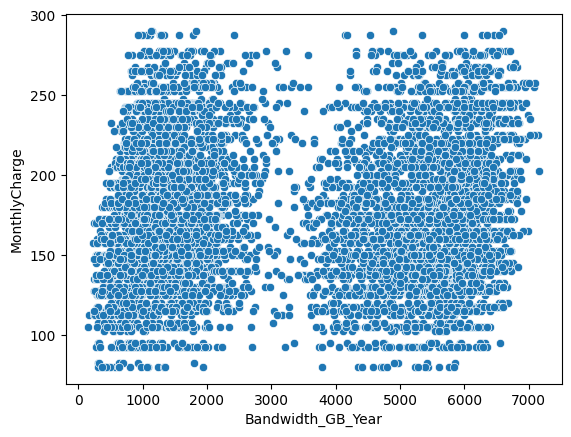

In [20]:
sns.scatterplot(x=df_numeric['Bandwidth_GB_Year'],y=df_numeric['MonthlyCharge'])
plt.show()

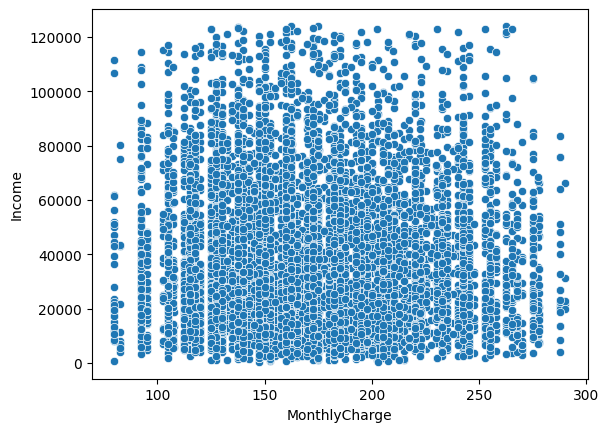

In [21]:
sns.scatterplot(x=df_numeric['MonthlyCharge'],y=df_numeric['Income'])
plt.show()

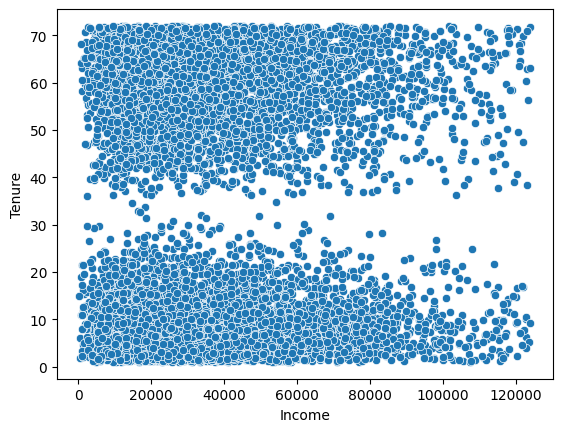

In [22]:
sns.scatterplot(x=df_numeric['Income'],y=df_numeric['Tenure'])
plt.show()

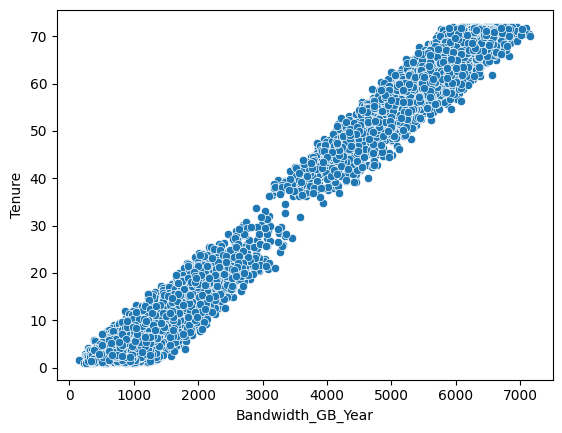

In [23]:
sns.scatterplot(x=df_numeric['Bandwidth_GB_Year'],y=df_numeric['Tenure'])
plt.show()

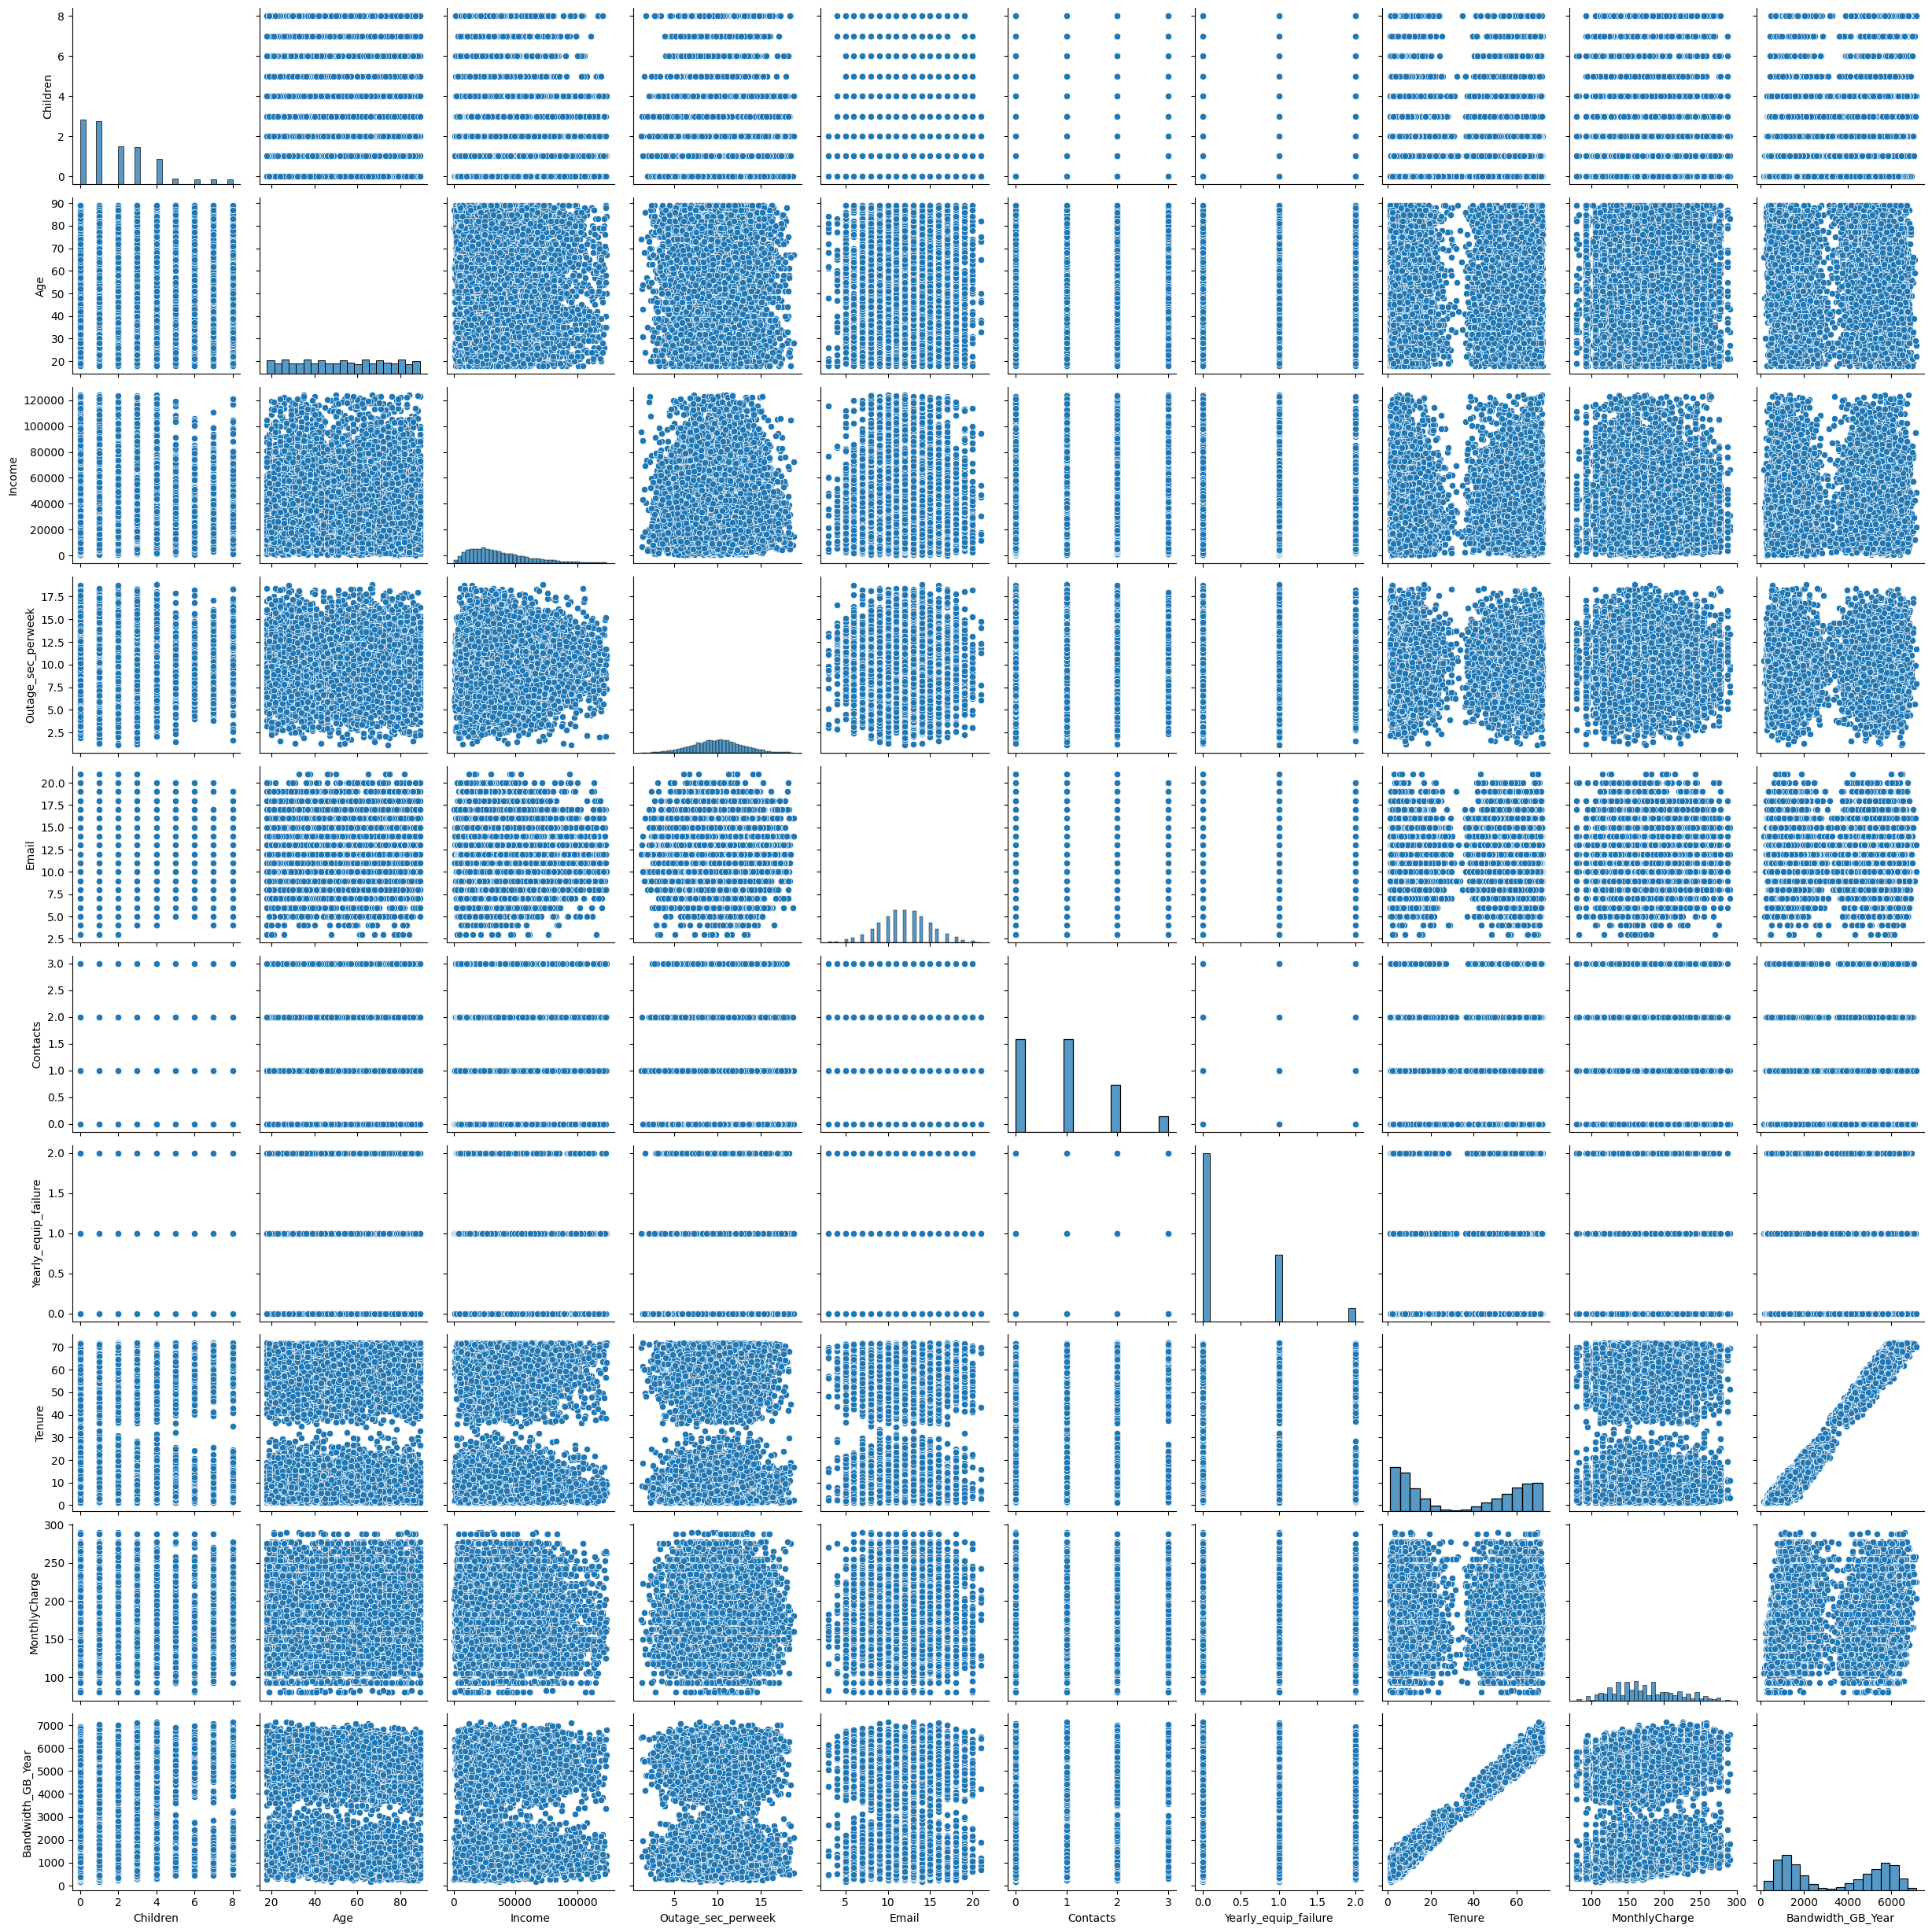

In [24]:
sns.pairplot(df_numeric, diag_kind='hist')

## Standarize Data

#### Standard Scaler

In [52]:
sc = StandardScaler()
sc.fit(df_numeric)
scaled_data_array = sc.transform(df_numeric)
scaled_data = pd.DataFrame(scaled_data_array, columns = df_numeric.columns)
scaled_data.head()

Children       Age    Income  Outage_sec_perweek     Email  Contacts  \
0 -0.497975 -1.267929 -0.661753            0.577519 -0.007198 -1.045438   
1  1.088855 -0.153217 -1.143209            0.254153 -1.003385 -1.045438   
2 -0.497975 -0.250148 -0.772394            1.675978  0.988989  1.174939   
3 -1.026918  1.446153  0.069452           -0.636170  1.321052  1.174939   
4  0.559911  1.446153 -0.623721           -0.542683  0.988989  2.285128   

   Yearly_equip_failure    Tenure  MonthlyCharge  Bandwidth_GB_Year  
0              1.072633 -1.258019       1.624861          -1.180036  
1              1.072633 -0.706000      -0.298598          -0.606271  
2             -0.642890 -0.655588      -1.228882          -0.555988  
3              1.072633 -1.238570      -0.531205          -1.422357  
4              1.072633 -1.037010       0.284363          -1.070944

#### Robust Scaler

In [53]:
robust_scaler = RobustScaler()
scaled_data_robust = robust_scaler.fit_transform(scaled_data)
scaled_data_robust_df = pd.DataFrame(scaled_data_robust, columns=scaled_data.columns)
scaled_data_robust_df.head()

Children       Age    Income  Outage_sec_perweek  Email  Contacts  \
0  0.000000 -0.722222 -0.333151            0.428237   0.00      -0.5   
1  1.000000 -0.083333 -0.697033            0.187467  -0.75      -0.5   
2  0.000000 -0.138889 -0.416773            1.246120   0.75       0.5   
3 -0.333333  0.833333  0.219491           -0.475444   1.00       0.5   
4  0.666667  0.833333 -0.304407           -0.405835   0.75       1.0   

   Yearly_equip_failure    Tenure  MonthlyCharge  Bandwidth_GB_Year  
0                   1.0 -0.534913       1.203057          -0.533094  
1                   1.0 -0.262048      -0.120663          -0.244968  
2                   0.0 -0.237130      -0.760883          -0.219717  
3                   1.0 -0.525299      -0.280744          -0.654780  
4                   1.0 -0.425667       0.280529          -0.478312

## Save to new file

In [27]:
df_numeric.to_csv('D212_prepared_task2_update.csv')

# PCA

In [54]:
pca = PCA()
pca.fit(scaled_data_robust_df)
components = pca.components_

print(components)

[[ 1.14989059e-02 -3.27899047e-03  9.08263711e-01 -2.25150966e-01
  -3.44908254e-01 -6.42299839e-04  1.15247937e-02  2.12211556e-02
  -6.54384995e-02  1.98399819e-02]
 [-6.49819490e-03  2.19267837e-03  3.04771637e-01 -1.96955442e-01
   9.23098291e-01  3.00506767e-04 -2.05889445e-02 -8.68474268e-02
  -1.75908316e-02 -8.88223252e-02]
 [ 5.36567775e-02 -2.62352796e-02  2.83421309e-01  9.41186931e-01
   1.17669304e-01  1.55247560e-02  1.56759371e-02  3.52544045e-02
   1.13217024e-01  4.33404770e-02]
 [ 2.17703474e-02  1.10905972e-02  1.07070629e-02 -1.22933509e-01
   9.73179412e-02 -5.40706467e-04  1.33136828e-02  6.04948940e-01
   4.52999067e-01  6.35103187e-01]
 [-1.26612140e-02  4.73297807e-02  3.19514101e-02 -7.72172657e-02
  -7.24467690e-02  6.16312197e-04 -1.50593118e-02 -3.42120413e-01
   8.79954048e-01 -3.06227017e-01]
 [ 9.87360135e-01 -9.68143101e-02 -2.47673127e-02 -5.09254412e-02
   2.31991840e-03 -4.38527741e-02  9.63298738e-02 -3.47599173e-02
   3.26968138e-04 -1.11302075e-02

In [55]:
test_pca = scaled_data_robust_df[['Children','Age','Income', 'Outage_sec_perweek', 'Email', 'Contacts','Yearly_equip_failure', 'Tenure','MonthlyCharge', 'Bandwidth_GB_Year']]
test_pca_normalized=(test_pca-test_pca.mean())/test_pca.std()
pca = PCA(n_components=test_pca.shape[1])
pca.fit(test_pca_normalized)
PCA(n_components=11)
test_pca2=pd.DataFrame(pca.transform(test_pca_normalized),columns=['PC1','PC2','PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10'])
loadings = pd.DataFrame(pca.components_.T, columns=['PC1','PC2','PC3','PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10'],
                       index=test_pca_normalized.columns)
print(test_pca2)
print(loadings)

           PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0    -1.636362  0.945825  1.279319 -0.548498  0.474996 -0.499239  0.168230   
1    -0.891948  1.606271  0.114526 -0.116317  1.204080 -1.325216  0.324575   
2    -0.928973 -0.654153  1.009774  0.378834 -1.920302 -0.808427  0.606658   
3    -1.939959 -1.719185 -0.133993  0.627797  0.341616  0.806677  1.913070   
4    -1.490911 -1.274104  1.036840  0.669387  0.646400  0.725839  1.756721   
...        ...       ...       ...       ...       ...       ...       ...   
8945  0.853645 -0.578123 -1.594023 -0.268192 -0.863053  0.642198  0.188212   
8946  1.906935  0.429743 -0.238099  0.665133 -1.613112  0.330036 -0.437068   
8947  0.590843 -0.073424 -1.470899 -0.553060  0.283267 -0.183729 -0.813355   
8948  2.034713 -0.473441  1.691762 -1.155315 -0.549907 -0.168077 -0.371037   
8949  1.572977 -0.310424  1.368555 -1.504578 -1.498001 -0.288392  0.527828   

           PC8       PC9      PC10  
0    -2.002846 -0.677345 -

In [56]:
loadings

PC1       PC2       PC3       PC4       PC5  \
Children              0.009316  0.648334  0.115351 -0.150357  0.111512   
Age                  -0.004663 -0.478585  0.023297 -0.052707  0.605775   
Income                0.001571  0.131226 -0.261266  0.395283 -0.098951   
Outage_sec_perweek    0.007887  0.195154  0.678742  0.204553 -0.219139   
Email                -0.024338 -0.115414  0.145073 -0.464208 -0.419422   
Contacts              0.001430 -0.421418  0.295088  0.548945 -0.289100   
Yearly_equip_failure  0.012286  0.307542  0.111529  0.428672  0.438422   
Tenure                0.705357 -0.021716 -0.040365  0.004880 -0.020868   
MonthlyCharge         0.042143 -0.096557  0.578800 -0.275137  0.332284   
Bandwidth_GB_Year     0.706949  0.004787 -0.000129 -0.014536 -0.015270   

                           PC6       PC7       PC8       PC9      PC10  
Children              0.189706 -0.036604  0.458496  0.532266 -0.019331  
Age                   0.208335  0.042425  0.580435 -0.134336  0.022284  
Income                0.776154 -0.304766 -0.050473 -0.225013 -0.001258  
Outage_sec_perweek   -0.127292 -0.154145  0.317601 -0.520062  0.000047  
Email                 0.456016  0.591527  0.062222 -0.109137  0.000125  
Contacts              0.069631  0.113133  0.090862  0.569653 -0.000452  
Yearly_equip_failure  0.032569  0.660990 -0.256120 -0.115280 -0.000030  
Tenure               -0.011823  0.025125  0.035981 -0.022062 -0.705236  
MonthlyCharge         0.296532 -0.282775 -0.520022  0.165229 -0.046486  
Bandwidth_GB_Year     0.007681  0.003597 -0.004135  0.007659  0.706830

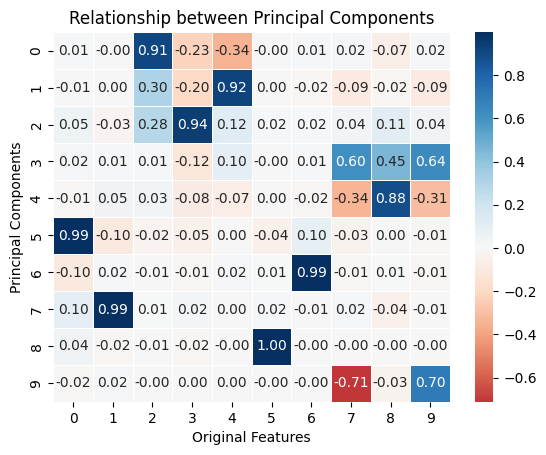

In [57]:
sns.heatmap(components, cmap="RdBu", center=0, annot=True, fmt=".2f", linewidths=0.5)
plt.title("Relationship between Principal Components")
plt.xlabel("Original Features")
plt.ylabel("Principal Components")
plt.show()

# Eigenvalues

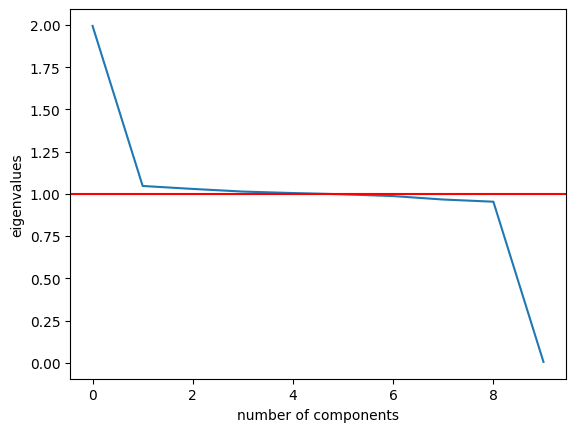

Eigenvector 1: [ 0.00931598 -0.0046634   0.00157121  0.00788728 -0.02433839  0.0014298
  0.01228583  0.70535729  0.04214329  0.70694871]
Eigenvector 2: [ 0.64833449 -0.4785846   0.13122628  0.19515395 -0.11541433 -0.42141835
  0.30754205 -0.0217156  -0.09655709  0.00478748]
Eigenvector 3: [ 1.15350759e-01  2.32971286e-02 -2.61265823e-01  6.78742187e-01
  1.45073226e-01  2.95087743e-01  1.11528669e-01 -4.03645344e-02
  5.78800212e-01 -1.29154945e-04]
Eigenvector 4: [-0.1503574  -0.05270686  0.39528306  0.20455266 -0.46420787  0.54894455
  0.42867169  0.00487989 -0.27513737 -0.01453559]
Eigenvector 5: [ 0.11151206  0.60577503 -0.09895086 -0.21913869 -0.41942153 -0.2891002
  0.43842194 -0.02086817  0.33228428 -0.01526998]
Eigenvector 6: [ 0.18970555  0.20833491  0.77615389 -0.12729183  0.45601631  0.06963065
  0.03256854 -0.01182279  0.29653249  0.00768117]
Eigenvector 7: [-0.03660351  0.04242548 -0.30476646 -0.15414451  0.59152712  0.1131329
  0.66098992  0.02512519 -0.2827753   0.003596

In [58]:
cov_matrix = np.dot(test_pca_normalized.T, test_pca_normalized) / test_pca.shape[0]
eigenvalues = [np.dot(eigenvector.T, np.dot(cov_matrix, eigenvector)) for eigenvector in pca.components_]

# Display eigenvalues
plt.plot(eigenvalues)
plt.xlabel('number of components')
plt.ylabel('eigenvalues')
plt.axhline(y=1, color="red")
plt.show()

# Display eigenvectors
for i, eigenvector in enumerate(pca.components_):
    print(f"Eigenvector {i+1}: {eigenvector}")

In [59]:
eigenvalues

[1.9939555160702047,
 1.0468251058908893,
 1.0293024460169544,
 1.0136490886231624,
 1.004916823168951,
 0.9975841763327815,
 0.9869594518662925,
 0.9665862155796137,
 0.9536203473940985,
 0.0054835106212907]

In [34]:
# Sort eigenvalues in descending order
eigenvalues_sorted = np.sort(eigenvalues)[::-1]

# Calculate the number of eigenvalues greater than 1
num_components = np.sum(eigenvalues_sorted > 1)

print(f"Number of Principal Components to Retain: {num_components}")

Number of Principal Components to Retain: 5


# Captured Variance per Prinicpal Component

In [61]:
# Get the captured variance per principal component as a percentage
captured_variance = pca.explained_variance_ratio_ * 100

# Print the captured variance for each component
for i, var in enumerate(captured_variance):
    print(f"Principal Component {i+1}: {var:.2f}%")

Principal Component 1: 19.94%
Principal Component 2: 10.47%
Principal Component 3: 10.29%
Principal Component 4: 10.14%
Principal Component 5: 10.05%
Principal Component 6: 9.98%
Principal Component 7: 9.87%
Principal Component 8: 9.67%
Principal Component 9: 9.54%
Principal Component 10: 0.05%


# Cummulative Sum of The Array

In [62]:
cumulative_variance = np.cumsum(pca.explained_variance_ratio_ *100)

In [63]:
cumulative_variance

array([ 19.94178329,  30.41120412,  40.70537877,  50.84300235,
        60.89329352,  70.87025002,  80.74094741,  90.40788968,
        99.94515877, 100.        ])

In [68]:
print("Variance explained by the First principal component =", captured_variance[0])
print("Variance explained by the First 2 principal component =", captured_variance[1])
print("Variance explained by the First 3 principal component  =", captured_variance[2])
print("Variance explained by the First 4 principal component  =", captured_variance[3])
print("Variance explained by the First 5 principal component  =", captured_variance[4])


Variance explained by the First principal component = 19.941783292913563
Variance explained by the First 2 principal component = 10.469420826599027
Variance explained by the First 3 principal component  = 10.29417464728101
Variance explained by the First 4 principal component  = 10.137623581603865
Variance explained by the First 5 principal component  = 10.050291169250318


In [69]:
pc5 = PCA(n_components=5, random_state=2020)
pc5.fit(scaled_data)
var_pca = pc5.transform(scaled_data)

pca_5 = pc5.explained_variance_ratio_ * 100
var_df1 = pd.DataFrame(pca_5, columns=['Captured Variance Per PC'], 
                       index=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])
var_df1 = var_df1.round(2)

var_df1

Captured Variance Per PC
PC1                     19.94
PC2                     10.47
PC3                     10.29
PC4                     10.14
PC5                     10.05

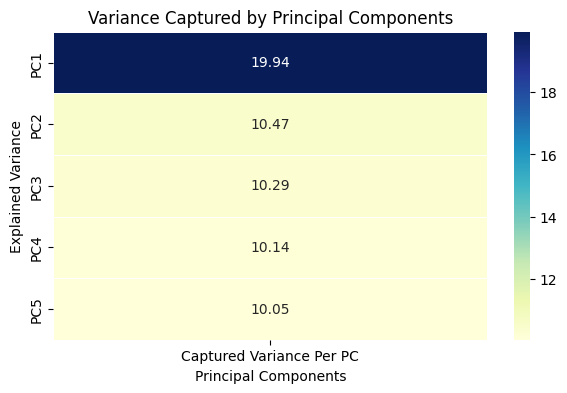

In [73]:
plt.figure(figsize=(7, 4))
sns.heatmap(var_df1, annot=True, fmt='.2f', linewidths=0.5, cmap='YlGnBu')
plt.title('Variance Captured by Principal Components')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance')
plt.show()


In [72]:
total_variance = np.sum(pc5.explained_variance_ratio_)
print("Total Variance Captured by Principal Components: {:.2f}%".format(total_variance * 100))


Total Variance Captured by Principal Components: 60.89%
